Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8960 - loss: 0.3760 - val_accuracy: 0.9533 - val_loss: 0.1702
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9514 - loss: 0.1706 - val_accuracy: 0.9662 - val_loss: 0.1265
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9647 - loss: 0.1237 - val_accuracy: 0.9702 - val_loss: 0.1128
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9727 - loss: 0.0953 - val_accuracy: 0.9725 - val_loss: 0.0968
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9782 - loss: 0.0761 - val_accuracy: 0.9735 - val_loss: 0.0915
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9728 - loss: 0.0925
 Test Accuracy: 0.9728


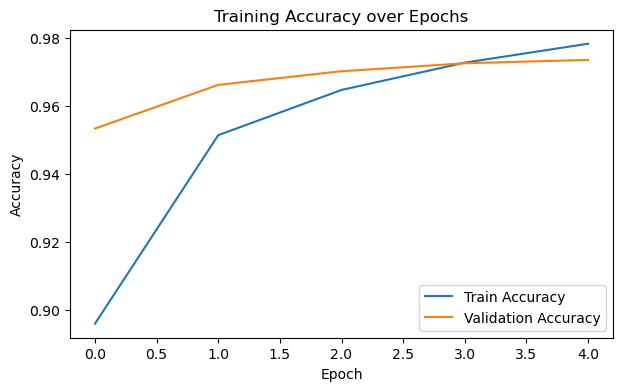

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# بارگذاری داده
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# نرمال سازی داده
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# تغییر شکل (اضافه کردن بعد کانال برای CNNهای آینده) 
x_train = x_train.reshape((-1, 28, 28))
x_test = x_test.reshape((-1, 28, 28))

# One-hot encoding 
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# ساخت مدل شبکه عصبی ساده 
model = keras.Sequential([layers.Input(shape=(28,28)),layers.Flatten(),layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')])

# کامپایل 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#  آموزش 
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

# ارزیابی 
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f" Test Accuracy: {test_acc:.4f}")

#  نمودار دقت 
plt.figure(figsize=(7,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
